# Training and evaluation using Google Colab

Google Colab provides free access to GPU computing that can greatly accelerate model training and inference. Click the button below to run the notebook on Colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/leibo-cmu/MatSeg/blob/master/colab.ipynb)

## Setup

In [1]:
# Connect git repo to colab, install package
!git clone https://github.com/leibo-cmu/MatSeg
!pip install -q -U albumentations
!pip install -q -U opencv-python
%cd MatSeg
%matplotlib notebook

Cloning into 'MatSeg'...
remote: Enumerating objects: 519, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 519 (delta 38), reused 109 (delta 35), pack-reused 407
Receiving objects: 100% (519/519), 89.80 MiB | 16.88 MiB/s, done.
Resolving deltas: 100% (227/227), done.
     |████████████████████████████████| 113 kB 5.0 MB/s 
     |████████████████████████████████| 48.3 MB 120 kB/s 
     |████████████████████████████████| 60.9 MB 1.2 MB/s 
/content/MatSeg


Make sure GPU is used for computation. If `torch.cuda.is_available()` is `False`, go to Runtime -> Change runtime type and select GPU.

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
!python train.py --dataset uhcs --config example_colab.yaml

Configurations
dataset : uhcs
config : example_colab.yaml
gpu_id : 0
seed : 42
device : cuda:0
img_folder : images
label_folder : labels
n_classes : 4
split_info : Namespace(test_split_file='test4A.txt', test_type='TextSplit', train_split_file='train16A.txt', type='TextSplit', val_split_file='validate4A.txt')
cross_validation : {'val_splits': [1, 2, 3, 4, 5, 0], 'test_splits': [0, 1, 2, 3, 4, 5]}
train_size : [224, 224]
eval_size : [484, 645]
mean : [0.485, 0.456, 0.406]
std : [0.229, 0.224, 0.225]
augmentations : {'Flip': {'p': 0.5}, 'ShiftScaleRotate': {'shift_limit': 0, 'scale_limit': [0, 1], 'rotate_limit': 45, 'p': 0.8}, 'RandomBrightnessContrast': {'brightness_limit': 0.2, 'contrast_limit': 0.3, 'p': 0.8}}
n_epochs : 30
train_repeat : 8
loss_type : CE
ignore_index : -1
batch_size : 4
optimizer : Namespace(decoder_lr=0.0005, encoder_lr=5e-05, type='AdamW', weight_decay=0.01)
lr_scheduler : Namespace(params={'milestones': [100], 'gamma': 0.3}, type='MultiStepLR')
metric : mIoU
data

In [4]:
!python eval.py --dataset uhcs --config example_colab.yaml --mode val

val | mIoU: 0.829 | accuracy: 0.964 | loss: 0.100


In [5]:
!python eval.py --dataset uhcs --config example_colab.yaml --mode test

test | mIoU: 0.813 | accuracy: 0.953 | loss: 0.129


In [6]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


def visualize(img_dir, label_dir, pred_dir, img_name, palette):
    fig, axs = plt.subplots(1, 3, dpi=100, figsize=(4*3, 3), constrained_layout=True)
    img = plt.imread(f"{img_dir}/{img_name}")
    label = np.load(f"{label_dir}/{img_name.split('.')[0]}.npy")
    pred = np.load(f"{pred_dir}/{img_name.split('.')[0]}.npy")
    axs[0].imshow(img, cmap='gray')
    axs[1].imshow(label, cmap=ListedColormap(palette), 
                  vmin=0, vmax=len(palette)-1, interpolation='nearest')
    axs[2].imshow(pred, cmap=ListedColormap(palette), 
                  vmin=0, vmax=len(palette)-1, interpolation='nearest')
    for i, xlabel in enumerate(['image', 'annotation', 'prediction']):
        axs[i].axes.xaxis.set_ticks([])
        axs[i].axes.yaxis.set_ticks([])
        axs[i].set_xlabel(xlabel)
    plt.show()


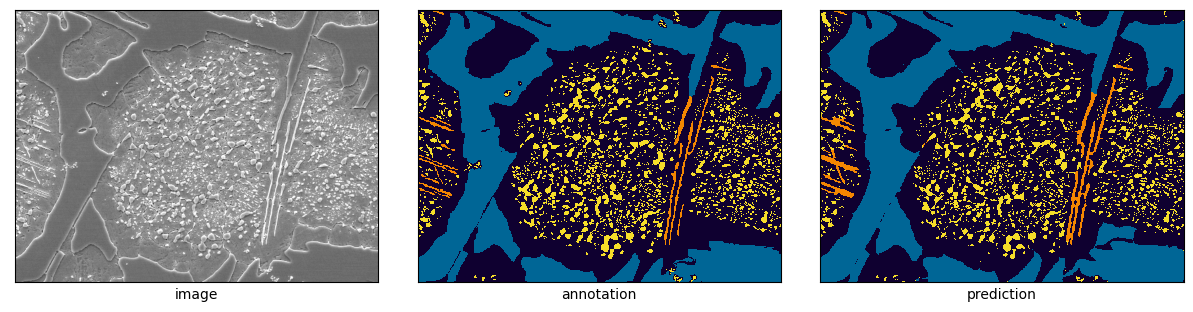

In [7]:
PALETTE_UHCS = ('#0f0030', '#006696', '#f5dd29', '#f38701')

visualize(img_dir='./data/uhcs/images', 
          label_dir='./data/uhcs/labels',
          pred_dir='./checkpoints/uhcs/example_colab/predictions',
          img_name='uhcs0006.tif',
          palette=PALETTE_UHCS)